# Task 1

In [507]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

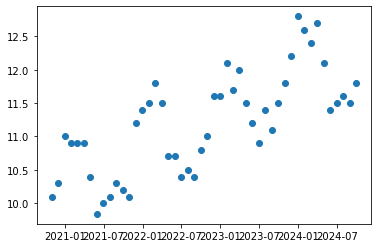

In [508]:
# importing natural gas data

data = pd.read_csv(r"C:\Users\hugoa\Downloads\Nat_Gas.csv")
data['Dates'] = pd.to_datetime(data['Dates'])

# plotting the natural gas data on a scatter plot

plt.scatter(data['Dates'], data['Prices'])

In [509]:
# initialising time array x, and natural gas price array y

x = np.array(pd.to_datetime(data['Dates']).dt.month)

for i in range(len(x)-3):
    x[i+3]+=12*(np.floor(i/12)+1)

y = np.array(data['Prices'])

In [510]:
# defining gradient descent function for an affine-trigonometric regression

def grad_descent(a, b, c, d, e, x, y, α):
    
    # initialise partial derivatives for summation 
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_e = 0

    # summation in computation of partial derivatives of least squares loss function
    for i in range(len(x)):
        grad_a += 2/len(x) *(y[i] - (a * np.sin(2*np.pi * (b * x[i] + c)) + d * x[i] + e)) \
                  * (- np.sin(2*np.pi * (b * x[i] + c)))
        grad_b += 2/len(x)*(y[i] - (a * np.sin(2*np.pi * (b * x[i] + c)) + d * x[i] + e)) \
                  * (- a * np.cos(2*np.pi * (b * x[i] + c)) * (2*np.pi * x[i]))
        grad_c += 2/len(x)*(y[i] - (a * np.sin(2*np.pi * (b * x[i] + c)) + d * x[i] + e)) \
                  * (- a * np.cos(2*np.pi * (b * x[i] + c)) * (2*np.pi))
        grad_d += 2/len(x)*(y[i] - (a * np.sin(2*np.pi * (b * x[i] + c)) + d * x[i] + e)) \
                  * (- x[i])
        grad_e += 2/len(x)*(y[i] - (a * np.sin(2*np.pi * (b * x[i] + c)) + d * x[i] + e)) \
                  * (-1)

    # new parameters after an application of gradient descent
    a -= α * grad_a
    b -= α * grad_b
    c -= α * grad_c
    d -= α * grad_d
    e -= α * grad_e
    
    return a, b, c, d, e  

In [548]:
# initialising coordinates (a, b, c, d, e) in our 5-dim'al parameter space, which appear to be "somewhat close" to the
# global minima of the least squares loss function

a = 1
b = 0.08
c =0.3
d = 0
e = 9.5

# initialising the learning rate α
α = 0.00004

# initialising number of iterations it
it = 100

#performing gradient descent from our initial position in paramter space, using our grad_descent function
for i in range(it):
    a, b, c , d, e = grad_descent(a, b, c, d, e, x, y, α)

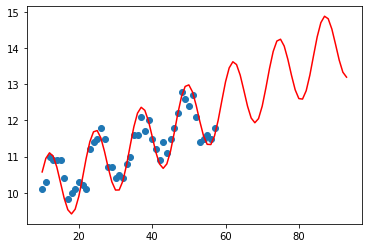

In [549]:
#plotting the results with an extra 36 months predicted data

plt.scatter(x, y)

    
X=np.zeros(len(x)+3*12)
for i in range(len(x)+3*12):
    X[i]=i+10
    
predicted_gas_price = np.zeros(len(x)+3*12)
for t in range(len(x)+3*12):
    predicted_gas_price[t] = a * np.sin(2*np.pi * (b * X[t] + c)) + d * X[t] + e

    
plt.plot(X, predicted_gas_price, color="red")

In [545]:
print(a,b,c,d,e)

0.9985075471578708 0.07989798025284343 0.29767546062025696 0.05037908560850706 9.501383426399734


In [363]:
# defining the predict natural gas price function

def predict_natural_gas_price(date):
    
    # assumes date is in the form 'm/dd/yyyy'
    
    # converts the input string into a datetime
    
    input_date = pd.to_datetime(date)
    
    #Check if input_date exists in natural gas data
    
    if input_date in data['Dates'].values:
        return data.loc[data['Dates'] == "10/31/20", 'Prices'].values[0]
    else:
        t = input_date.month + 12*(input_date.year - data['Dates'][0].year)
        return predicted_gas_price[t]
        

In [391]:
# testing predict_natural_gas_price function

predict_natural_gas_price('8/10/24')

12.077392583326825

# Task 2

In [416]:
# defining contract pricing model

def contract_pricing(purchased_Btu, purchase_date, sell_date,
                     storage_cost_MMBtu_per_month, inj_withd_cost_per_MMBtu):
    # purchased Btu in MMBtu
    purchased_MMBtu = purchased_Btu / 1000000
    
    # price for purchasing the natural gas on purchase date, and revenue for selling the  
    # natural gas on the sell date
    purchase_price = purchased_Btu * predict_natural_gas_price(purchase_date)
    revenue_from_sale = purchased_Btu * predict_natural_gas_price(sell_date)
    
    # total time the natural gas is kept in storage, in months
    months_in_storage = (pd.to_datetime(sell_date).month + 12 * pd.to_datetime(sell_date).year) \
                        - (pd.to_datetime(purchase_date).month + 12 * pd.to_datetime(purchase_date).year)
    
    # Additional costs
    total_storage_cost = months_in_storage * storage_cost_MMBtu_per_month * purchased_MMBtu
    total_inj_withd_cost = purchased_MMBtu * inj_withd_cost_per_MMBtu
    
    additional_costs = total_storage_cost + total_inj_withd_cost
    
    total_profit = revenue_from_sale - purchase_price - additional_costs
    
    return total_profit


In [422]:
# testing contract_pricing function

contract_pricing(5000000, '8/10/24', '2/1/25', 100000, 10000)

5896193.46306815

# Task 3

In [424]:
# importing

loan_data = pd.read_csv(r"C:\Users\hugoa\Downloads\Task 3 and 4_Loan_Data.csv")
loan_data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [447]:
# initialising feature vectors X[i] and target vectors Y[i]
X = np.array(loan_data.drop(['customer_id', 'default'], axis=1))
X = np.c_[ X, np.ones(len(X)) ] 

Y = np.array(loan_data['default'])

# splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)


In [448]:
# defining sigmoid function

def σ(z):
    return 1 / (1 + np.exp(-z))

In [497]:
# defining gradient descent function

def grad_descent_2(Θ, X, Y, α_2):
    
    # initialising partial derivatives for summation
    grad_θ_0 = 0
    grad_θ_1 = 0
    grad_θ_2 = 0
    grad_θ_3 = 0
    grad_θ_4 = 0
    grad_θ_5 = 0
    grad_θ_6 = 0
    
    # summation in computation of partial derivatives of cross-entropy loss function
    for i in range(len(X)):
        grad_θ_0 += -1/len(X) * X[i][0] * (Y[i] - σ(np.dot(Θ, X[i])))
        grad_θ_1 += -1/len(X) * X[i][1] * (Y[i] - σ(np.dot(Θ, X[i])))
        grad_θ_2 += -1/len(X) * X[i][2] * (Y[i] - σ(np.dot(Θ, X[i])))
        grad_θ_3 += -1/len(X) * X[i][3] * (Y[i] - σ(np.dot(Θ, X[i])))
        grad_θ_4 += -1/len(X) * X[i][4] * (Y[i] - σ(np.dot(Θ, X[i])))
        grad_θ_5 += -1/len(X) * X[i][5] * (Y[i] - σ(np.dot(Θ, X[i])))
        grad_θ_6 += -1/len(X) * X[i][6] * (Y[i] - σ(np.dot(Θ, X[i])))
        
    # new parameters after an application of gradient descent
    Θ = Θ - α * np.array([grad_θ_0, grad_θ_1, grad_θ_2, grad_θ_3, grad_θ_4, grad_θ_5, grad_θ_6])
    
    return Θ

In [498]:
# initialise the coordinates of our 7-dim'al parameter vector Θ

Θ = np.array([0, 0, 1, 1, 1, 1, 1])

# initialising the learning rate α
α_2 = 0.00004

# initialising number of iterations it
it_2 = 300

# performing gradient descent on the train data

for i in range(it_2):
    Θ = grad_descent_2(Θ, X_train, Y_train, α_2)

C:\Users\hugoa\AppData\Local\Temp\ipykernel_40560\1462904389.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [499]:
Θ

array([ 3.51525805e-04,  1.44216269e-02,  2.04338048e+00, -4.09396337e-01,
        9.99523723e-01,  9.63464122e-01,  9.99966012e-01])

In [500]:
# initialising PD (Probability of Default) for test data

PD_test = np.zeros(len(Y_test))
for i in range(len(Y_test)):
    PD_test[i] = σ(np.dot(Θ, X_test[i]))
    if PD_test[i] < 0.5:
        PD_test[i]=0
    else:
        PD_test[i]=1

C:\Users\hugoa\AppData\Local\Temp\ipykernel_40560\1462904389.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


<AxesSubplot:>

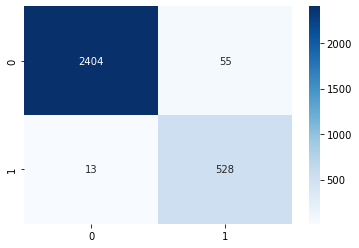

In [501]:
# testing the logistic regression model on the test data and plotting the results using a confusion matrix

from sklearn.metrics import confusion_matrix

# compute the confusion matrix for test data
conf_matrix = confusion_matrix(Y_test, PD_test)

import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

# Task 4

In [597]:
# importing data

loan_data_2 = pd.read_csv(r"C:\Users\hugoa\Downloads\Task 3 and 4_Loan_Data.csv")

In [645]:
# defining calculate log-likelihood function

def calc_log_likelihood(data):
    
    log_likelihood = 0
    
    for b in range(No_Buckets):
        bucket_b_data = data[data['Bucket']==b]
        
        if not bucket_b_data.empty:
            n_b = len(bucket_b_data)
            k_b = bucket_b_data['default'].sum()
            p_b = k_b/n_b if n_b>0 else 0
            log_likelihood += k_b*np.log(p_b) + (n_b - k_b)*np.log(1-p_b)
            
    return log_likelihood

In [664]:
# initialising bucketing of continuous FICO score data into categorical data

No_Buckets = 4
bucket_boundaries =np.array([400, 450, 500, 700, 750, 850])
loan_data_2['Bucket'] = pd.cut(loan_data_2['fico_score'], bins=bucket_boundaries, labels=False, include_lowest=True)
loan_data_2

# Displaying data
loan_data_2

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Bucket
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,2
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,2
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,2
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,2
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,2
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,2
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,2
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,2
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,2


In [665]:
calc_log_likelihood(loan_data_2)

-4511.92344341322

In [672]:
# optimization of bucket boundaries


# initialising bucket boundaries
# np.linspace(loan_data_2['fico_score'].min(), loan_data_2['fico_score'].max(), No_Buckets+1)

# initialising best log likelihood
best_likelihood = calc_log_likelihood(loan_data_2)

# initialising improved boolean
improved = True

# initialising number of iterations it_3 and current iteration t
it_3 = 1000
t=0

# performing optimization of bucket boundaries

while improved and t<it_3:
    
    improved = False
    
    for i in range(1, len(bucket_boundaries)-1):
        original_boundary = bucket_boundaries[i]
        # shifting bucket boundaries both up and down and testing the change in log likelihood
        for shift in [-20, 20]:
            bucket_boundaries[i] += shift
            loan_data_2['Bucket'] = pd.cut(loan_data_2['fico_score'], bins=bucket_boundaries, labels=False, include_lowest=True)
            new_likelihood = calc_log_likelihood(loan_data_2)
            
            if new_likelihood > best_likelihood:
                # then update best_likelihood
                best_likelihood = new_likelihood
                improved = True
            else: 
                # otherwise revert bucket_boundaries
                bucket_boundaries[i] = original_boundary
    t += 1
        
    

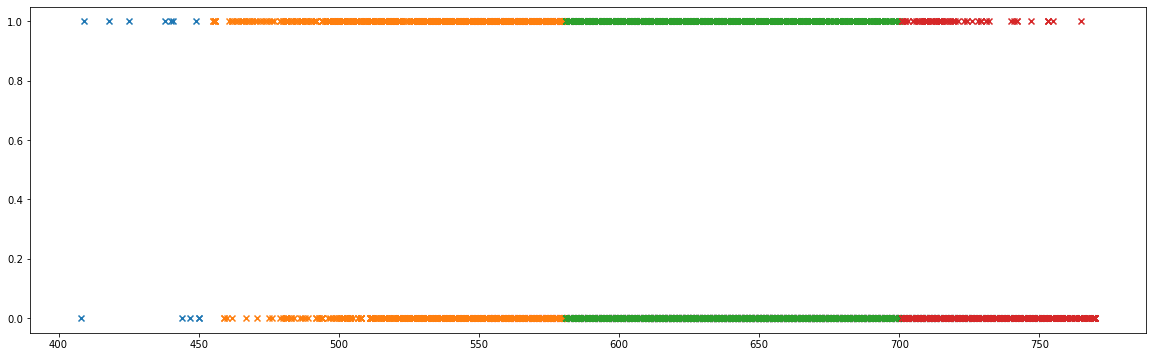

In [673]:
# plotting results using colours per bucket
plt.figure(figsize=(20,6))
for b in range(No_Buckets):#
    bucket_b_data = loan_data_2[loan_data_2['Bucket']==b]
    plt.scatter(bucket_b_data['fico_score'], bucket_b_data['default'], label = f'bucket {b}', marker = 'x')